# Heart Attacks Prediction

## About Dataset

### 1. age - in years
### 2. sex - (1=male,0=female)
### 3. cp - chest pain type
####      0 : Typical angina: chest pain related decrease blood supply to the heart
####      1 : Atypical angina: chest pain not related to heart
####      2 : Non-anginal pain: typically esophageal spasms (non heart related)
####      3 : Asymptomatic: chest pain not showing signs of disease
### 4. trestbps - resting blood Pressure
### 5. chol - serum cholestoral in mg/dl
### 6. fbs - fasting blood sugar
### 7. restecg - resting electrocardiographic results
### 8. thalach - maximum heart rate achieved
### 9. exang - exercise induced angina (1 = yes; 0 = no)
### 10. oldpeak - ST depression induced by exercise
### 11. slope - the slope of the peak exercise ST segment
### 12. ca - number of major vessels (0-3) colored by flourosopy
### 13. thal - thalium stress result
### 14. target - have disease or not (1=yes, 0=no)

##     
## Importing the Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis (EDA)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Showing the total count of target Column(target=1 or target=0)

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

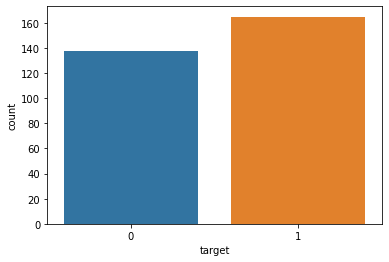

In [8]:
# Count the target class
sns.countplot(df['target'])

#### checking the missing values

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Visualization

## Pair Plot of Heart Attack Dataframe

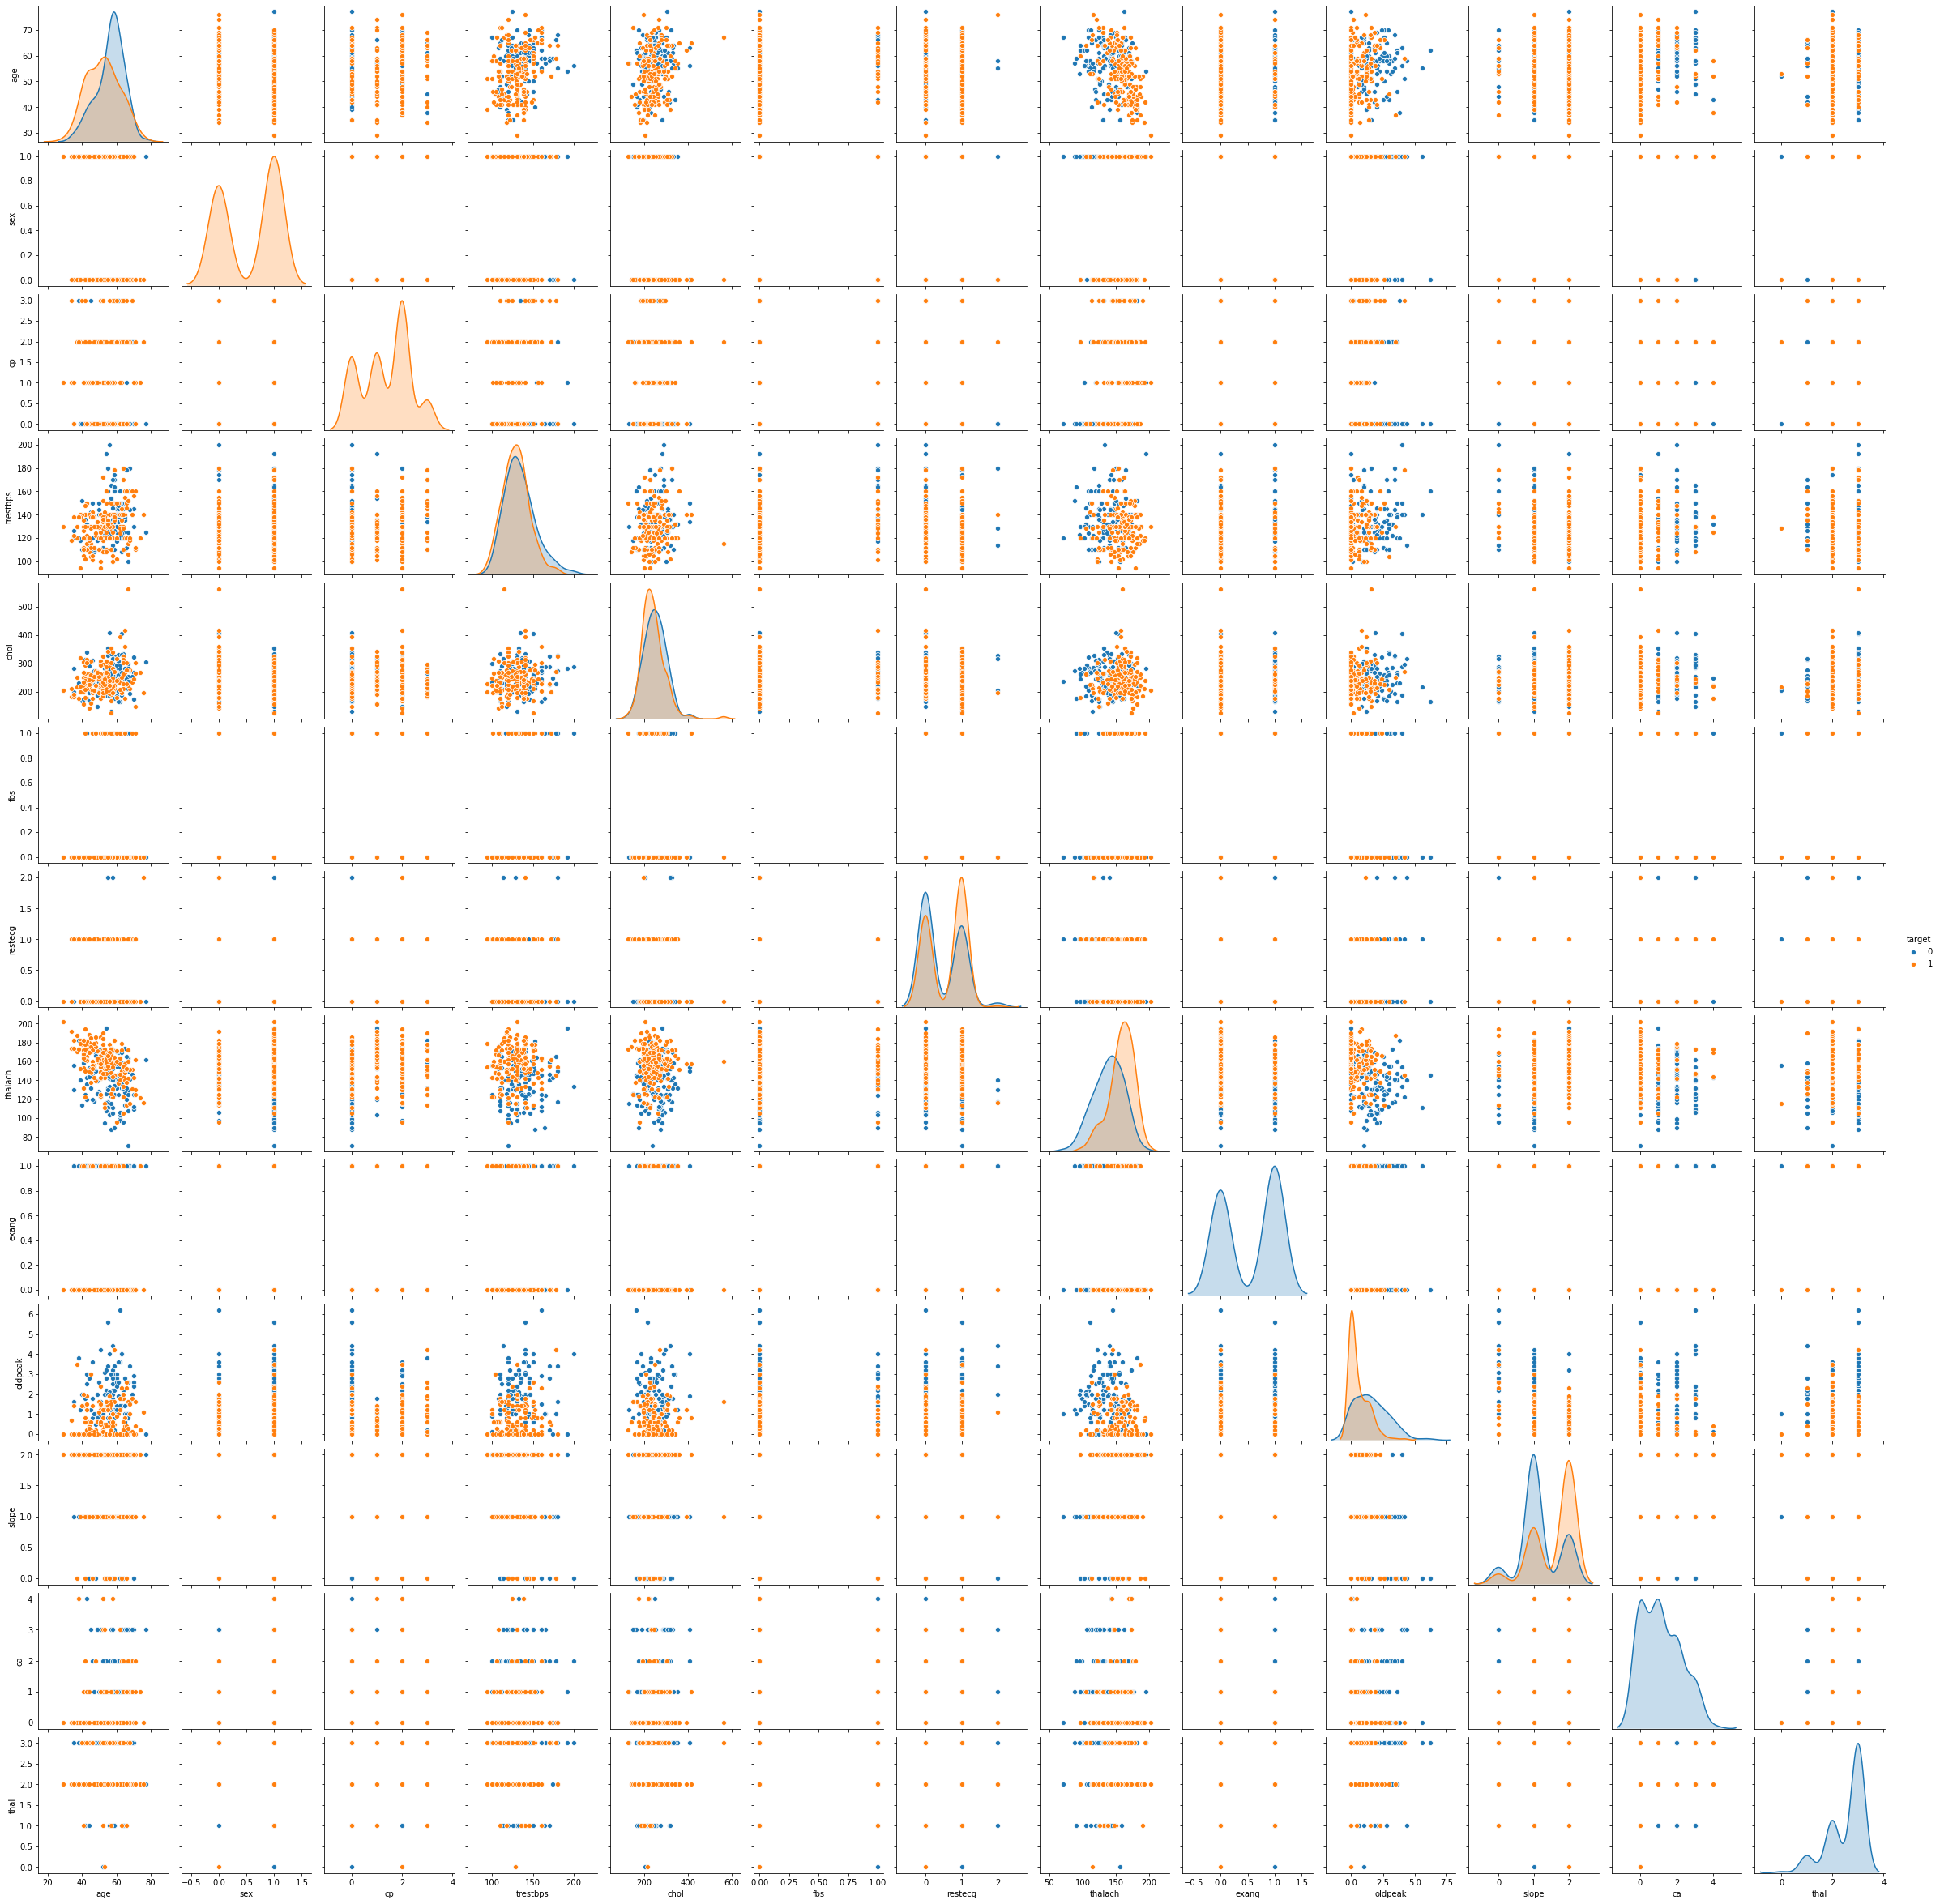

In [11]:
# Paiplot of heart attack dataframe
sns.pairplot(df, hue = 'target')

## Feature Selection 

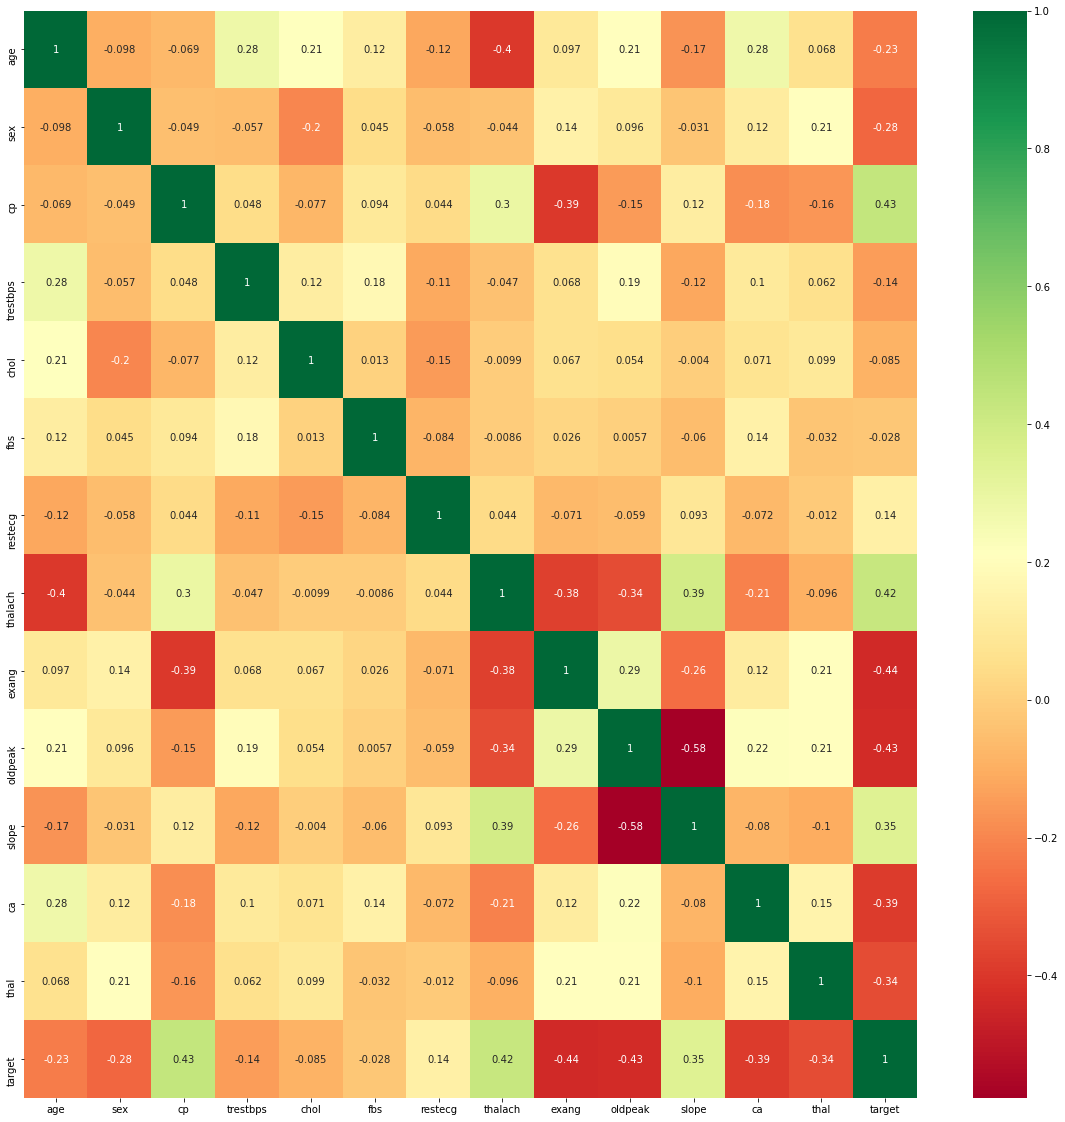

In [11]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204DDFC9400>,
      dtype=object)

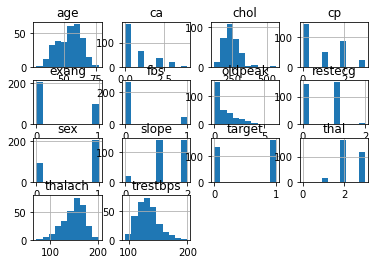

In [12]:
df.hist()

# Data Processing  

#### After Exploring the dataset, I observed that i need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First I will use the get_dummies method to create dummy columns for categorical variables.

In [13]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

## Feature Scaling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [15]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [16]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16,0.544554,0.316832,0.683168,0.471947,0.165017,...,0.468647,0.577558,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,0.547855,0.386139
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,0.498835,0.466011,0.466011,0.500038,0.371809,...,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.236774,0.498528,0.487668
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trestbps   303 non-null    float64
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_0      303 non-null    uint8  
 7   sex_1      303 non-null    uint8  
 8   cp_0       303 non-null    uint8  
 9   cp_1       303 non-null    uint8  
 10  cp_2       303 non-null    uint8  
 11  cp_3       303 non-null    uint8  
 12  fbs_0      303 non-null    uint8  
 13  fbs_1      303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  exang_0    303 non-null    uint8  
 18  exang_1    303 non-null    uint8  
 19  slope_0    303 non-null    uint8  
 20  slope_1   

# Applying Machine Learning Algorithms

In [18]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.shape

(212, 30)

In [21]:
y_train.shape

(212,)

In [22]:
X_test.shape

(91, 30)

In [23]:
y_test.shape

(91,)

# Logistic Regression

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(C=1, penalty='l1', solver='liblinear')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.8461538461538461

# SVM(Support Vector Machine)

In [26]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.8791208791208791

# K - Nearest Neighbor Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

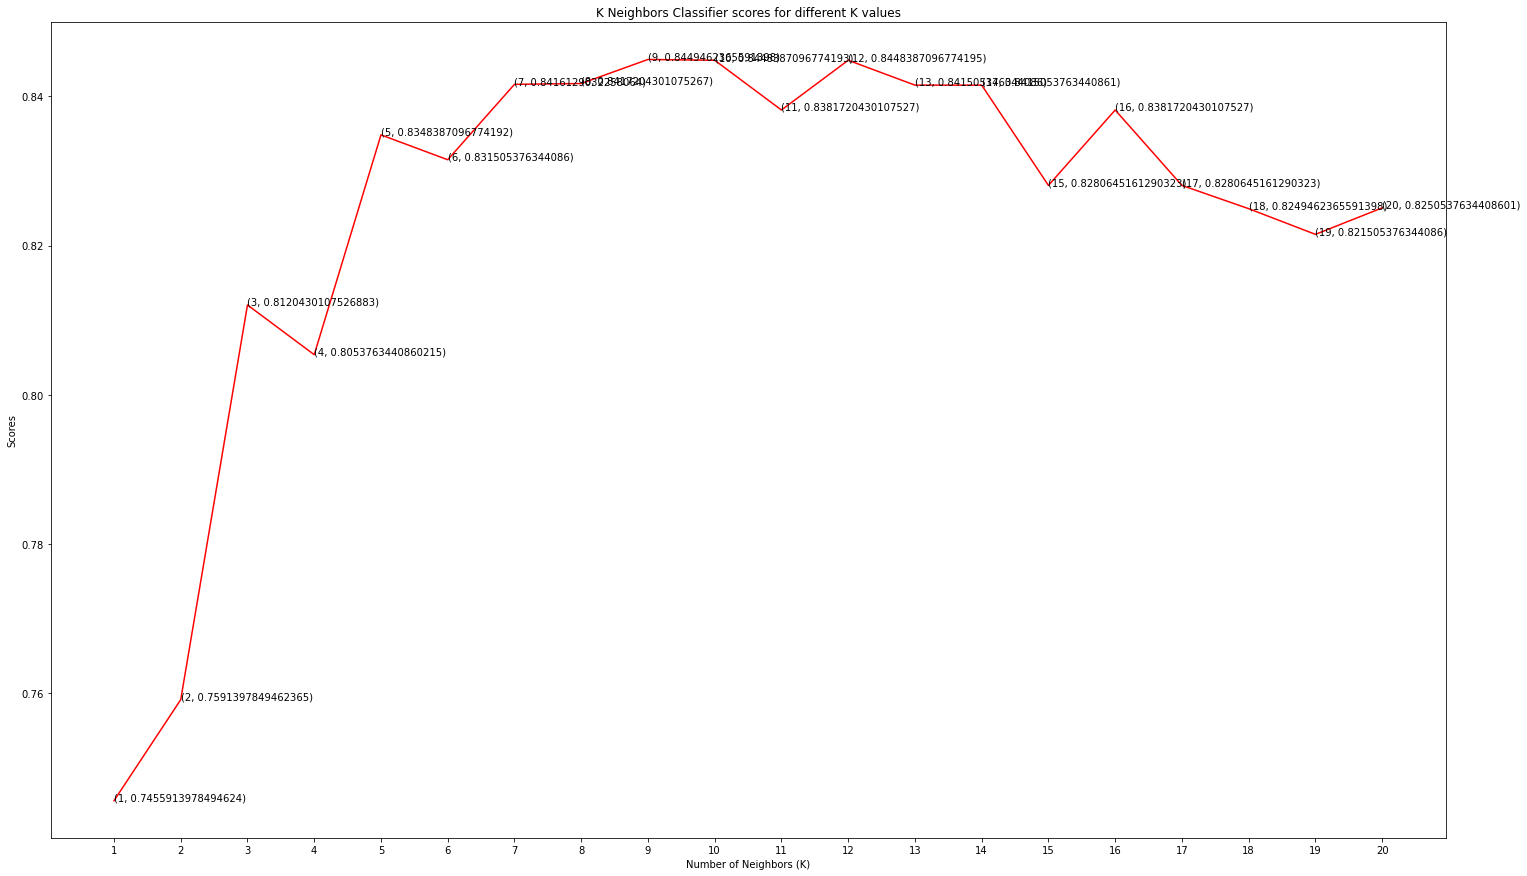

In [28]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [30]:
score.mean()

0.8448387096774195

# Decision Tree Classifier

In [31]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7692307692307693

# Random Tree Classifier

In [32]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8131868131868132

# XGBOOST

In [33]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

[16:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8241758241758241

# XGBoost Parameter Tuning Randomized Search

In [34]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [35]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost


In [36]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [37]:
classifier=xgboost.XGBClassifier()

In [38]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [39]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.3s finished


[16:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 12.79 seconds.


In [40]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [41]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [43]:
classifier_pt=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [44]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

[16:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [45]:
score

array([0.90322581, 0.83870968, 0.87096774, 0.8       , 0.86666667,
       0.76666667, 0.7       , 0.76666667, 0.73333333, 0.8       ])

In [46]:
score.mean()

0.8046236559139786

# GUI using Tkinter

In [47]:
daf=dataset
from pandas import DataFrame
from sklearn import linear_model
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [57]:
St=daf
df=DataFrame(St,columns=['age','trestbps','chol','thalach','oldpeak','target','sex_0','sex_1','cp_0','cp_1','cp_2','cp_3','fbs_0','fbs_1','restecg_0','restecg_1','restecg_2','exang_0','exang_1','slope_0','slope_1','slope_2','ca_0','ca_1','ca_2','ca_3','ca_4','thal_0','thal_1','thal_2','thal_3'])
X=df[['age','trestbps','chol','thalach','oldpeak','sex_0','cp_0','cp_1','fbs_0','restecg_0','exang_0','slope_0','ca_0','ca_1','thal_0','thal_3']].astype(int)
y=df['target'].astype(int)
regr=linear_model.LogisticRegression()
regr.fit(X,y)
print('Intercept:\n',regr.intercept_)
print('Coefficients: \n',regr.coef_)

Intercept:
 [0.00933042]
Coefficients: 
 [[ 0.19133045 -0.4299278  -0.07374202  0.79190909 -1.13189079  1.0103745
  -1.51613495 -0.1625524  -0.07376564 -0.45267046  0.88615985  0.31859079
   1.83768083  0.08574498 -0.37485317 -1.34298954]]


In [58]:
#tkinter GUI
root=tk.Tk()
canvas1=tk.Canvas(root,width=800,height=600,bg='pink')
canvas1.pack()
#with sklearn
Intercept_result=('Intercept: ',regr.intercept_)
label_Intercept=tk.Label(root,text=Intercept_result,justify='center')
canvas1.create_window(300,310,window=label_Intercept)
# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(300, 330, window=label_Coefficients)

#
label1 = tk.Label(root, text='Type Age: ')
canvas1.create_window(100, 100, window=label1)
#
entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

##
label2 = tk.Label(root, text=' Type trestbps: ')
canvas1.create_window(100, 120, window=label2)
##
entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

###
label3 = tk.Label(root, text='Type chol: ')
canvas1.create_window(100, 140, window=label3)
###
entry3 = tk.Entry (root) # create 3rd entry box
canvas1.create_window(270, 140, window=entry3)

#4
label4 = tk.Label(root, text='Type thalach: ')
canvas1.create_window(100, 160, window=label4)

entry4 = tk.Entry (root) # create 4th entry box
canvas1.create_window(270, 160, window=entry4)

#5
label5 = tk.Label(root, text='Type oldpeak: ')
canvas1.create_window(100, 180, window=label5)

entry5 = tk.Entry (root) # create 5th entry box
canvas1.create_window(270, 180, window=entry5)

#6
label6 = tk.Label(root, text='Type sex_0: ')
canvas1.create_window(100, 200, window=label6)

entry6 = tk.Entry (root) # create 6th entry box
canvas1.create_window(270, 200, window=entry6)

#7
label7 = tk.Label(root, text='Type cp_0: ')
canvas1.create_window(500, 100, window=label7)

entry7 = tk.Entry (root) # create 7th entry box
canvas1.create_window(660, 100, window=entry7)

#8
label8 = tk.Label(root, text='Type cp_1: ')
canvas1.create_window(500, 120, window=label8)

entry8 = tk.Entry (root) # create 8th entry box
canvas1.create_window(660, 120, window=entry8)

#9
label9 = tk.Label(root, text='Type fbs: ')
canvas1.create_window(500, 140, window=label9)

entry9 = tk.Entry (root) # create 9th entry box
canvas1.create_window(660, 140, window=entry9)

#10
label10 = tk.Label(root, text='Type rest_ecg: ')
canvas1.create_window(500, 160, window=label10)

entry10 = tk.Entry (root) # create 10th entry box
canvas1.create_window(660, 160, window=entry10)

#11
label11 = tk.Label(root, text='Type exang: ')
canvas1.create_window(500, 180, window=label11)

entry11 = tk.Entry (root) # create 11th entry box
canvas1.create_window(660, 180, window=entry11)

#12
label12 = tk.Label(root, text='Type slope: ')
canvas1.create_window(500, 200, window=label12)

entry12 = tk.Entry (root) # create 12th entry box
canvas1.create_window(660, 200, window=entry12)

#13
label13 = tk.Label(root, text='Type ca: ')
canvas1.create_window(100, 220, window=label13)

entry13 = tk.Entry (root) # create 13th entry box
canvas1.create_window(270, 220, window=entry13)

#14
label14 = tk.Label(root, text='Type ca1: ')
canvas1.create_window(100, 240, window=label14)

entry14 = tk.Entry (root) # create 13th entry box
canvas1.create_window(270, 240, window=entry14)

#15
label15 = tk.Label(root, text='Type thal: ')
canvas1.create_window(500, 220, window=label15)

entry15 = tk.Entry (root) # create 12th entry box
canvas1.create_window(660, 220, window=entry15)

#16
label16 = tk.Label(root, text='Type thal3: ')
canvas1.create_window(500, 240, window=label16)

entry16 = tk.Entry (root) # create 12th entry box
canvas1.create_window(660, 240, window=entry16)


def values(): 
    global New_age #our 1st input variable
    New_age = int(entry1.get())
    
    global New_trestbps #our 2nd input variable
    New_trestbps = int(entry2.get())
    
    global New_chol
    New_chol=int(entry3.get())
    
    global New_thalach
    New_thalach=int(entry4.get())
    
    global New_oldpeak
    New_oldpeak=int(entry5.get())
    
    global New_sex
    New_sex=int(entry6.get())
    
    global New_cp
    New_cp=int(entry7.get())
    
    global New_cp1
    New_cp1=int(entry8.get())
    
    global New_fbs
    New_fbs=int(entry9.get())
    
    global New_rest
    New_rest=int(entry10.get())
    
    global New_exang
    New_exang=int(entry11.get())
    
    global New_slope
    New_slope=int(entry12.get())
    
    global New_ca
    New_ca=int(entry13.get())
    
    global New_ca1
    New_ca1=int(entry14.get())
    
    global New_thal
    New_thal=int(entry15.get())
    
    global New_thal3
    New_thal3=int(entry16.get())
    
    Prediction_result  = ('Predicted Value: ', regr.predict([[New_age,New_trestbps,New_chol,New_thalach,New_oldpeak,New_sex,New_cp,New_cp1,New_fbs,New_rest,New_exang,New_slope,New_ca,New_ca1,New_thal,New_thal3]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(350, 380, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict target',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(320, 280, window=button1)
root.mainloop()